In [6]:
library(tidyverse)
library(deSolve)
library(ggplot2)
library(minpack.lm)

In [12]:
df_plague <- read.csv(file = "/home/valentin/CaseStudiesLifeSciences/data_plague_2017_madagascar.csv")
df_plague %>%
  mutate(total = pneumonic+bubonic) -> df_plague
df_plague$date <- as.Date(df_plague$date, format = "%d/%m/%Y")

time_points <- nrow(df_plague)

In [17]:

I0 = 1.0 

In [76]:
si <- function(t, y, parms) {
    with(as.list(c(y, parms)), {
        dy <- numeric(2)
        dy[1] <- delta - alpha * y[1] * y[2] / (y[1] + y[2]) - death1 * y[1]
        dy[2] <- alpha * y[1] * y[2] / (y[1] + y[2]) - death2 * y[2]
        return(list(c(dy)))
    })
}

y0 <-  c(s = 25570895, I = I0)
times <- seq(1,118, by = 1)
params <- c(delta = 0.01, alpha = 0.1, death1 = 0.01, death2 = 0.01)
 

In [77]:
out <- ode(y = y0, times = times, func = si, parms = params)
length(out[,3])

[1] 118

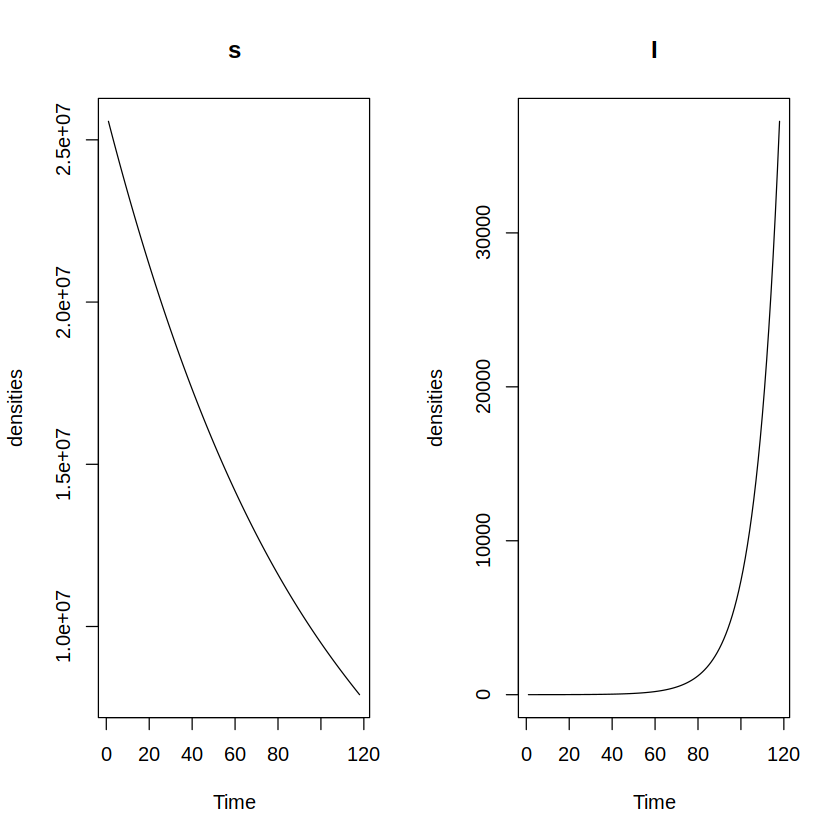

In [78]:
plot(out, xlab="Time", ylab = "densities")


In [119]:
objective <- function(pars) {
  data <- c(df_plague$total)
  times <- seq(1, length(data), by = 1)
  initial_conditions <- c(25570895, pars[1])  # Use estimated initial value
  out <- ode(y = initial_conditions, times = times, func = si, parms = pars[2:length(pars)])
  model_values <- out[,3]  # Exclude time column
  residuals <- as.vector(model_values - data)
  return(residuals)
}



In [118]:
objective(pars = c(I0 = 0.0001, delta = 0.01, alpha = 0.01, death1 = 0.1, death2 = 0.1))

[1] 88569

In [126]:


fit <- nls.lm(par = c(I0 = 1, delta = 1, alpha = 1, death1 = 1, death2 = 1),lower = c(0.0, 0.0, 0.0, 0.0, 0.0),, fn = objective,,control =  nls.lm.control(maxiter = 500))



In [127]:
summary(fit)


Parameters:
        Estimate Std. Error t value Pr(>|t|)    
I0     1.030e-06  2.110e-06   0.488    0.627    
delta  0.000e+00  3.161e-01   0.000    1.000    
alpha  3.406e-01  3.179e-02  10.713  < 2e-16 ***
death1 1.981e-01  2.115e-03  93.663  < 2e-16 ***
death2 5.003e-02  7.566e-03   6.613  1.3e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.399 on 113 degrees of freedom
Number of iterations to termination: 76 
Reason for termination: Relative error between `par' and the solution is at most `ptol'. 

In [130]:
I0 <- coef(fit)[1]
pars <- coef(fit)[-1]  
out <- ode(y = c(25570895, I0), times = times, func = si, parms = pars)


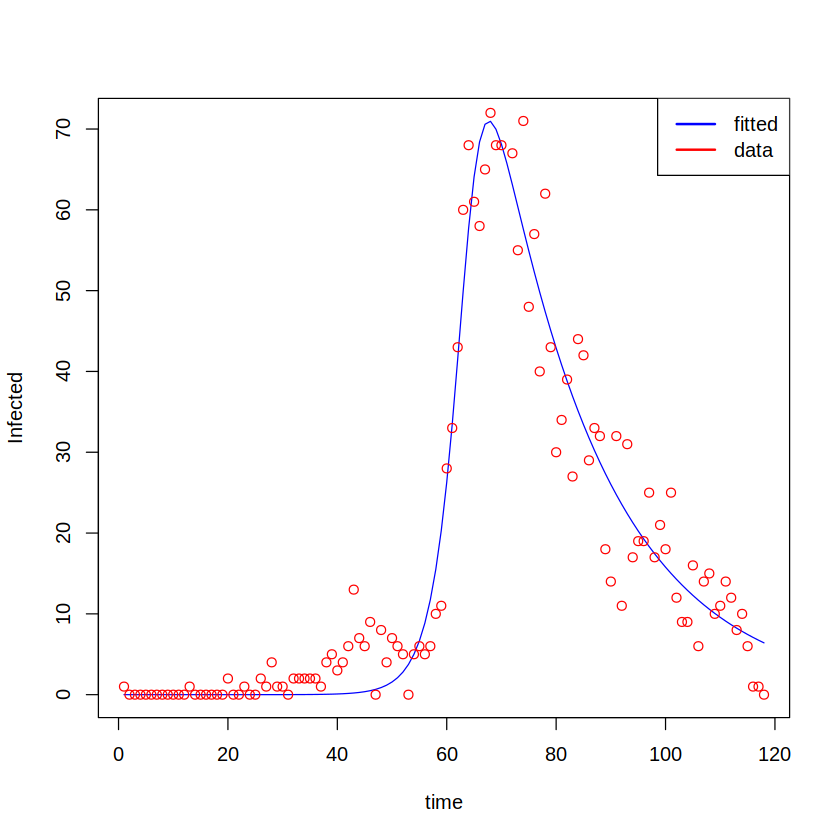

In [136]:
plot(times, out[,3], type = "l" ,col = "blue", xlab = "time", ylab = "Infected")
lines(times, df_plague$total, type = "p", col = "red")
legend("topright", legend = c("fitted", "data"), col = c("blue", "red"), lwd = 2)